### Using Features to Detect Diabetes
**Goal:** The goal of this project is to identify more effective ways for detecting people who are at risk for diabetes. Several classification models (Logistic Regression, Decision Trees, Random Trees, KNearestNeighbor, SVC) will be trained to detect diabetes based on the provided details/features. From there, we can evaluate which of the provided features have the most importance and can enhance the accuracy of the model to predict risk of diabetes.

**Data Problem:** The data task is to train and tune different classification models that group individuals into non-diabetic or diabetic based on their features.

**Expected Results:** The expected results of this project is a quality model with high accuracy that can be used to predict which features can help determine whether an individual is at risk for diabetes


**Data**

The data is sourced from Kaggle.

Link: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset 

#### Import and Setup

In [22]:
import pandas as pd
import time
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.ensemble import RandomForestClassifier

#### Data Overview 

- 100000 samples/rows 
- 9 columns: 
       1. gender: whether the person is male, female, or identifies as other
       2. age: how old the individual is; diabetes tends to be diagnosed in older adults
       3. hypertension: a medical condition that the entry either doesn't have (0) or has (1)
       4. heart_disease: history of whether the entry has heart disease (1) or not (0). 
       5. smoking_history: what kindof history the entry has with smoking. Values are ['never', 'No Info', 'current', 'former', 'ever', 'not current'].
       6. bmi: body mass index that's calculated based on height and weight. Higher values typically indicate higher chance of diabetes.
       7. HbA1c_level: Hemoglobin A1c levels, which are an individual's blood sugar levels.
       8. blood_glucose_level: the amount of glucose in a person's bloodstream.
       9. diabetes: whether the individual has diabetes or not; 0 means No, 1 means Yes.

In [23]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [3]:
print(df.shape)
df.head()

(100000, 9)


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


#### Data Analysis

**Data Distribution**

The data is distributed with about 90% of the entries not having diabetes and about 10% of the entries having diabetes. Because of the difference in entries as well as the importance of predicting true positives, the recall metric seems most suitable for evaluating the models.

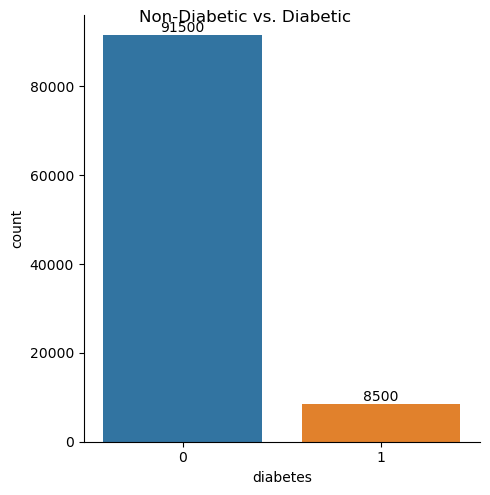

In [6]:
#checking the distribution of data based on non-diabetic vs. diabetic
fig = sns.catplot(x = 'diabetes', kind = 'count', data = df)
fig.fig.suptitle("Non-Diabetic vs. Diabetic")
for fig in fig.axes.flat:
    fig.bar_label(fig.containers[0])

**Exploratory Data Analysis**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [4]:
df.isna().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

**Gender Distribution**

About 58.552% of the patients represented in the dataset identify as male, 41.43% identify as female, and 0.18% identify as 'other'.

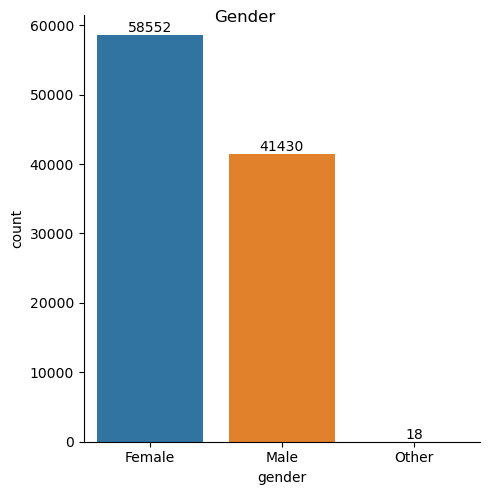

In [8]:
#checking the distribution of data based on gender
fig = sns.catplot(x = 'gender', kind = 'count', data = df)
fig.fig.suptitle("Gender")
for fig in fig.axes.flat:
    fig.bar_label(fig.containers[0])

**Age Distribution**

With a dataset containing the information of 100,000 patients, the average age was about 41.89 years old, the youngest age was 0.08 years old, and the oldest patient was 80 years old.

One thing to note was that individuals >= 2 years old sometimes had decimals for their age. I initially considered reformatting these values to whole numbers, but decided to keep them as they represent the most accurate representation of the pateints' ages.

In [6]:
print('Average Patient Age: ', df['age'].mean())
print('Youngest Patient Age: ', df['age'].min())
print('Oldest Patient Age: ', df['age'].max())

Average Patient Age:  41.885856
Youngest Patient Age:  0.08
Oldest Patient Age:  80.0


**Hypertension Distribution**

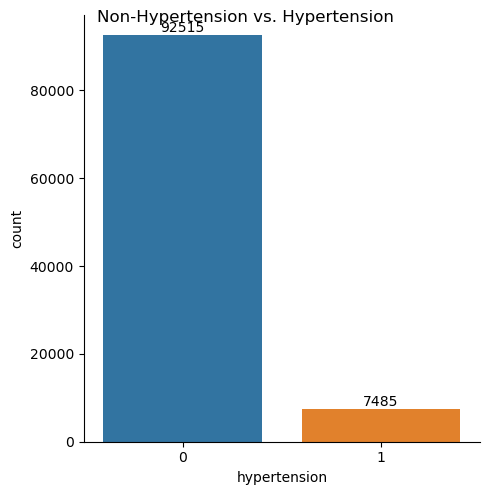

In [10]:
#checking the distribution of data based on no hypertension vs. hypertension
fig = sns.catplot(x = 'hypertension', kind = 'count', data = df)
fig.fig.suptitle("Non-Hypertension vs. Hypertension")
for fig in fig.axes.flat:
    fig.bar_label(fig.containers[0])

**Heart Disease History Distribution**

The distribution of heart disease among the dataset appear to be about 96.058% of the patients don't have a history of heart disease while 3.942% of the patients do have a history of heart disease

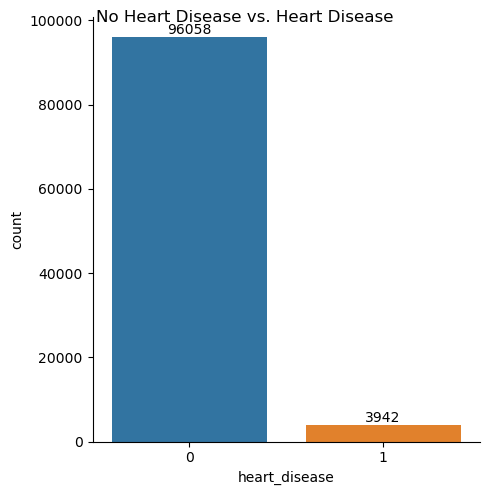

In [11]:
#checking the distribution of data based on no heart disease vs. heart disease
fig = sns.catplot(x = 'heart_disease', kind = 'count', data = df)
fig.fig.suptitle("No Heart Disease vs. Heart Disease")
for fig in fig.axes.flat:
    fig.bar_label(fig.containers[0])

**Smoking History Distribution**

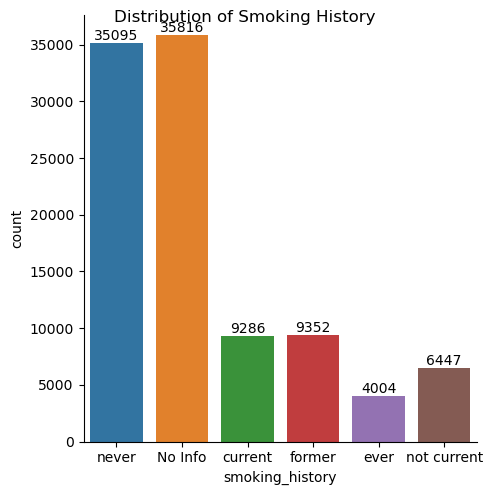

In [12]:
#checking the distribution of data based on smoking history
fig = sns.catplot(x = 'smoking_history', kind = 'count', data = df)
fig.fig.suptitle("Distribution of Smoking History")
for fig in fig.axes.flat:
    fig.bar_label(fig.containers[0])

**BMI Analysis**

After analyzing the bmi levels of the patients in the dataset, the average bmi is 27.32, lowest bmi is 10.01, and highest bmi is 95.69. 

To better understand these values, the range (BMI 18.5–24.9) usually indicates little to no risk of diabetes, the range (BMI 25–29.9) is considered at risk of diabetes, and the range (BMI ≥ 30) usually indicates a very high risk or already has diabetes. 

In [13]:
print('Average BMI: ', df['bmi'].mean())
print('Lowest BMI: ', df['bmi'].min())
print('Highest BMI: ', df['bmi'].max())

Average BMI:  27.3207671
Lowest BMI:  10.01
Highest BMI:  95.69


**HbA1c Level Analysis**

After analyzing the HbA1c levels of the patients in the dataset, the average is about 5.53, the lowest is 3.5, and the highest is 9.0.

To provide a better understanding of these values, an HbA1c level < 5.7% usually means no diabetes, an HbA1c level within the range (5.7% - 6.4%) usually means at risk of diabetes, and an HbA1c level ≥ 6.5% usually means the individual has diabetes.

In [14]:
print('Average HbA1c Level: ', df['HbA1c_level'].mean())
print('Lowest HbA1c Level: ', df['HbA1c_level'].min())
print('Highest HbA1c Level: ', df['HbA1c_level'].max())

Average HbA1c Level:  5.527507
Lowest HbA1c Level:  3.5
Highest HbA1c Level:  9.0


**Blood Glucose Level Analysis**

Blood Glucose is measured in mg/dL. The average glucose level was 138.06, the lowest was 80, and the highest was 300. 

To provide a better understanding of these values, a normal glucose level is ['Fasting': 70-99, 'Post-Meal': < 140], a pre-diabetic glucose level is: ['Fasting': 100-125, 'Post-Meal': 140-199], and a diabetic glucose level is ['Fasting': > 126, 'Post-Meal': > 200].

In [15]:
print('Average Blood Glucose Level: ', df['blood_glucose_level'].mean())
print('Lowest Blood Glucose Level: ', df['blood_glucose_level'].min())
print('Highest Blood Glucose Level: ', df['blood_glucose_level'].max())

Average Blood Glucose Level:  138.05806
Lowest Blood Glucose Level:  80
Highest Blood Glucose Level:  300


#### Data Setup

For this step, we are trying to convert all the values into numerical values. The only two categories we need to worry about are 'gender' and 'smoking_history'. This can be accomplished using the get_dummies() function, where the new columns can be placed into a temporary variable while added into the main dataset while removing the original 'gender' and 'smoking_history' columns.

In [24]:
#taking columns with multiple text values and converting them into columns with numerical values
dummies = pd.get_dummies(df[['gender', 'smoking_history']], dtype='int')
df = df.join(dummies)
df = df.drop(['gender', 'smoking_history'], axis=1)

df.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,80.0,0,1,25.19,6.6,140,0,1,0,0,0,0,0,0,1,0
1,54.0,0,0,27.32,6.6,80,0,1,0,0,1,0,0,0,0,0
2,28.0,0,0,27.32,5.7,158,0,0,1,0,0,0,0,0,1,0
3,36.0,0,0,23.45,5.0,155,0,1,0,0,0,1,0,0,0,0
4,76.0,1,1,20.14,4.8,155,0,0,1,0,0,1,0,0,0,0


In [20]:
df.to_csv('new_dataset.csv')

In [5]:
#train_test_split
X = df.drop(['diabetes'], axis=1)
y = df['diabetes']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Determining Optimal Hyperparameters

Because only one set of train/test sets will be used, Holdout Cross Validation will be implemented. 

GridSearchCV will be used to to figure out the hyperparameters required for maximum metric values.

**Logistic Regression**

A pipeline object is created to standardize the data using StandardScaler and instantiate a Logistic Regression model. 
GridSearchCV is used to find 3 hyperparameters: the regularization strength (C) with the options being [0.01, 0.1, 1, 10, 100],
what solver to use, which could be ['liblinear', 'saga'], and the penalty, with the options being ['l1', 'l2'].
The optimal model has a regularization strength of 0.01, the solver 'liblinear', and the 'l1' penalty.

In [6]:
#Determinng best parameters for Logistic Regression
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('logistic', LogisticRegression(max_iter=1000))
])

# Define the hyperparameter grid
param_grid = {
    'logistic__C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'logistic__solver': ['liblinear', 'saga'],  # Solver to use
    'logistic__penalty': ['l1', 'l2']  # Type of regularization
}

# Set up GridSearchCV
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit the model to the training data
grid_search.fit(X_train, y_train)

# Display the best parameters and score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best hyperparameters: {'logistic__C': 0.01, 'logistic__penalty': 'l1', 'logistic__solver': 'liblinear'}
Best cross-validation score: 0.9608625
Test set score: 0.9591


**Decision Tree Classifier**

A pipeline object is created to standardize the data using StandardScaler and instantiate a Decision Tree Classifier model. 
GridSearchCV is used to find 4 hyperparameters: the criterion with the options being ['gini', 'entropy'],
the max depth with the options being  [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10], the minimum samples split with the options being [1, 2, 3, 4, 5, 10],
and the minimum samples leaf with the options being [1, 2, 3, 4, 5].
The optimal model has the criterion 'gini', max depth of 2, minimum samples leaf of 1, and minimum samples split of 2.

In [7]:
#Determinng best parameters for Decision Tree Classifier
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('classifier', DecisionTreeClassifier())
])

param_grid = {
    'classifier__criterion': ['gini', 'entropy'],
    'classifier__max_depth': [None, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'classifier__min_samples_split': [2, 3, 4, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 3, 4, 5],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 550 candidates, totalling 2750 fits
Best parameters found:  {'classifier__criterion': 'gini', 'classifier__max_depth': 2, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 2}
Best cross-validation score: 0.9718
Test set score: 0.97215


**Random Forest Classifier**

A pipeline object is created to standardize the data using StandardScaler and instantiate a Random Forest Classifier model. 
GridSearchCV is used to find 5 hyperparameters: the number of estimators with the options being [50, 100, 200],
the max depth which could be [None, 10, 20, 30], the minimum samples split with the options being [2, 5, 10], 
the minimum samples leaf with the options being [1, 2, 4], and the boostrap with the options being [True, False].
The optimal model has 200 estimators, a max depth of None, 10 minimum samples split, 4 minimum samples leaf, and bootstrap set to True.

In [8]:
#Determinng best parameters for Random Forest Classifier
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('rf', RandomForestClassifier())
])

param_grid = {
    'rf__n_estimators': [50, 100, 200],
    'rf__max_depth': [None, 10, 20, 30],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(pipeline, 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Metric for optimization
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best Parameters: {'rf__bootstrap': True, 'rf__max_depth': None, 'rf__min_samples_leaf': 4, 'rf__min_samples_split': 10, 'rf__n_estimators': 200}
Best Cross-Validation Score: 0.971875
Test set score: 0.9724


**SVC**

A pipeline object is created to standardize the data using StandardScaler and instantiate a SVC model. 
GridSearchCV is used to find 3 hyperparameters: the regularization parameter (C) with the options being [0.1, 1, 10],
the kernel type which could be ['linear', 'rbf'], and the kernel coefficient (gamma) which could be ['scale', 'auto', 0.1, 1]
The optimal model has a regularization paramter of 10, a kernel type of 'rbf', and a gamma of 0.1.

In [5]:
#Determinng best parameters for SVC
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('svm', SVC())
])

param_grid = {
    'svm__C': [0.1, 1, 10],  # Regularization parameter
    'svm__kernel': ['linear', 'rbf'],  # Kernel types
    'svm__gamma': ['scale', 'auto', 0.1, 1],  # Kernel coefficient
}

grid_search = GridSearchCV(pipeline, 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Metric for optimization
                           n_jobs=-1,  # Use all available cores
                           verbose=2)

# Perform grid search
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'svm__C': 10, 'svm__gamma': 0.1, 'svm__kernel': 'rbf'}
Best Cross-Validation Score: 0.9643999999999998
Test set score: 0.96335


**KNearestNeighbor**

A pipeline object is created to standardize the data using StandardScaler and instantiate a KNearestNeighbor model. 
GridSearchCV is used to find 4 hyperparameters: the number of neighbors with could range from [1-20] with an interval of 2,
the weight which could be ['uniform', 'distance'], the leaf size with the options being [5, 10, 15], 
and the value p with the options being [1, 2].
The optimal model has 9 neighbors, a weight of 'uniform', a leaf size of 10, and a value of 2 for p.

In [11]:
#Determinng best parameters for KNN
pipeline = Pipeline([
    ('scale', StandardScaler()),
    ('knn', KNeighborsClassifier())
])

param_grid = {'knn__n_neighbors': list(range(1, 20, 2)),
          'knn__weights': ['uniform', 'distance'],
          'knn__leaf_size': [5, 10, 15],
          'knn__p': [1, 2],
}

grid_search = GridSearchCV(pipeline, 
                           param_grid=param_grid, 
                           cv=5,  # 5-fold cross-validation
                           scoring='accuracy',  # Metric for optimization
                           n_jobs=-1,  # Use all available cores
                           verbose=2)
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Evaluate on the test set
test_score = grid_search.score(X_test, y_test)
print("Test set score:", test_score)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
Best Parameters: {'knn__leaf_size': 10, 'knn__n_neighbors': 9, 'knn__p': 2, 'knn__weights': 'uniform'}
Best Cross-Validation Score: 0.9611500000000002
Test set score: 0.96045


#### Model Training

With about 90% of the dataset being non-diabetic and 10% of the dataset being diabetic, I've decided to use recall as the metric of value. Recall measures how many of the positive cases are actually correctly identified, and is calculated as (True Positive) / (True Positives + False Negatives), or: 

$$
\frac{TP}{TP + FN}
$$

With the optimal hyperparameters figured out, they can be used to determine the best precision, recall, and accuracy scores.

In [35]:
model_list = ['Logistic Regression', 'Decision Tree', 'Random Tree', 'SVM', 'KNN']
train_score = []
test_score = []
fit_time = []
prec_score = []
rec_score = []

**Logistic Regression Model**

In [36]:
#Creating/Testing Logistic Regressgion Model
start_time = time.time()
pipeline = Pipeline([('scale', StandardScaler()),
                 ('lgr', LogisticRegression(max_iter=1000, 
                                            C = 0.01, penalty = 'l1', solver = 'liblinear'))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
y_pred = pipeline.predict(X_test)
print("Precision Score:", precision_score(y_test, y_pred))
print("Recall Score:", recall_score(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Logistic Regression Train Score:", pipeline.score(X_train, y_train))
print("Logistic Regression Test Score:", pipeline.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(pipeline.score(X_train, y_train))
test_score.append(pipeline.score(X_train, y_train))
fit_time.append(elapsed_time)
prec_score.append(precision_score(y_test, y_pred))
rec_score.append(recall_score(y_test, y_pred))

Precision Score: 0.8823024054982818
Recall Score: 0.6012880562060889
Accuracy Score: 0.9591
Logistic Regression Train Score: 0.9608125
Logistic Regression Test Score: 0.9591
Fit Time: 0.4795961380004883


**Decision Tree Classifier Model**

In [37]:
#Creating/Testing DecisionTreeClassifier Model
start_time = time.time()
pipeline = Pipeline([('scale', StandardScaler()),
                       ('dtc', DecisionTreeClassifier(criterion = 'gini', max_depth = 2, 
                                    min_samples_split = 2, min_samples_leaf = 1))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
y_pred = pipeline.predict(X_test)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Decision Tree Train Score:", pipeline.score(X_train, y_train))
print("Decision Tree Test Score:", pipeline.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(pipeline.score(X_train, y_train))
test_score.append(pipeline.score(X_train, y_train))
fit_time.append(elapsed_time)
prec_score.append(precision_score(y_test, y_pred))
rec_score.append(recall_score(y_test, y_pred))

Precision Score:  1.0
Recall Score:  0.6738875878220141
Accuracy Score:  0.97215
Decision Tree Train Score: 0.9718
Decision Tree Test Score: 0.97215
Fit Time: 0.06598806381225586


**Random Forest Classifier Model**

In [38]:
#Creating/Testing RandomForestClassifier Model
start_time = time.time()
pipeline = Pipeline([('scale', StandardScaler()),
                       ('rfc', RandomForestClassifier(bootstrap = True, max_depth=None, 
                                                   min_samples_leaf=4, min_samples_split = 10, n_estimators=200))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
y_pred = pipeline.predict(X_test)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Decision Tree Train Score:", pipeline.score(X_train, y_train))
print("Decision Tree Test Score:", pipeline.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(pipeline.score(X_train, y_train))
test_score.append(pipeline.score(X_train, y_train))
fit_time.append(elapsed_time)
prec_score.append(precision_score(y_test, y_pred))
rec_score.append(recall_score(y_test, y_pred))

Precision Score:  0.9965606190885641
Recall Score:  0.6785714285714286
Accuracy Score:  0.97235
Decision Tree Train Score: 0.9738375
Decision Tree Test Score: 0.97235
Fit Time: 8.388327836990356


**SVC Model**

In [39]:
#Creating/Testing SVC Model
start_time = time.time()
pipeline = Pipeline([('scale', StandardScaler()),
                     ('svm', SVC(C = 10, kernel='rbf', gamma = 0.1))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
y_pred = pipeline.predict(X_test)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("SVC Train Score:", pipeline.score(X_train, y_train))
print("SVC Test Score:",pipeline.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(pipeline.score(X_train, y_train))
test_score.append(pipeline.score(X_train, y_train))
fit_time.append(elapsed_time)
prec_score.append(precision_score(y_test, y_pred))
rec_score.append(recall_score(y_test, y_pred))

Precision Score:  0.9737609329446064
Recall Score:  0.5866510538641686
Accuracy Score:  0.96335
SVC Train Score: 0.967
SVC Test Score: 0.96335
Fit Time: 69.14727759361267


**KNearestNeighbor Model**

In [40]:
#Creating/Testing KNN Model
start_time = time.time()
knn_pipe = Pipeline([('scale', StandardScaler()), 
                      ('model', KNeighborsClassifier(n_neighbors=9, leaf_size = 10, 
                                                     p = 2, weights = 'uniform'))]).fit(X_train, y_train)
end_time = time.time()
elapsed_time = end_time - start_time
y_pred = knn_pipe.predict(X_test)
print("Precision Score: ", precision_score(y_test, y_pred))
print("Recall Score: ", recall_score(y_test, y_pred))
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("KNN Train Score:", knn_pipe.score(X_train, y_train))
print("KNN Test Score:",knn_pipe.score(X_test, y_test))
print("Fit Time:", elapsed_time)
train_score.append(knn_pipe.score(X_train, y_train))
test_score.append(knn_pipe.score(X_train, y_train))
fit_time.append(elapsed_time)
prec_score.append(precision_score(y_test, y_pred))
rec_score.append(recall_score(y_test, y_pred))

Precision Score:  0.9362511893434824
Recall Score:  0.5761124121779859
Accuracy Score:  0.96045
KNN Train Score: 0.9655875
KNN Test Score: 0.96045
Fit Time: 0.3057706356048584


#### Model Evaluation and Summary of Results

Best Accuracy: **Random Tree Classifier** with a score of 0.974

Best Precision: **Decision Tree Classifier** with a score of 1

Best Recall: **Random Tree Classifier** with a score of 0.679

In [41]:
res_dict = {'Model': model_list,
           'Train Time': fit_time,
           'Train Accuracy': train_score,
           'Test Accuracy': test_score,
           'Precision Score': prec_score,
           'Recall Score': rec_score,}
results_df = pd.DataFrame(res_dict).set_index('Model')
results_df

,Train Time,Train Accuracy,Test Accuracy,Precision Score,Recall Score
Model,,,,,
Logistic Regression,0.479596,0.960812,0.960812,0.882302,0.601288
Decision Tree,0.065988,0.971800,0.971800,1.000000,0.673888
Random Tree,8.388328,0.973838,0.973838,0.996561,0.678571
SVM,69.147278,0.967000,0.967000,0.973761,0.586651
KNN,0.305771,0.965588,0.965588,0.936251,0.576112


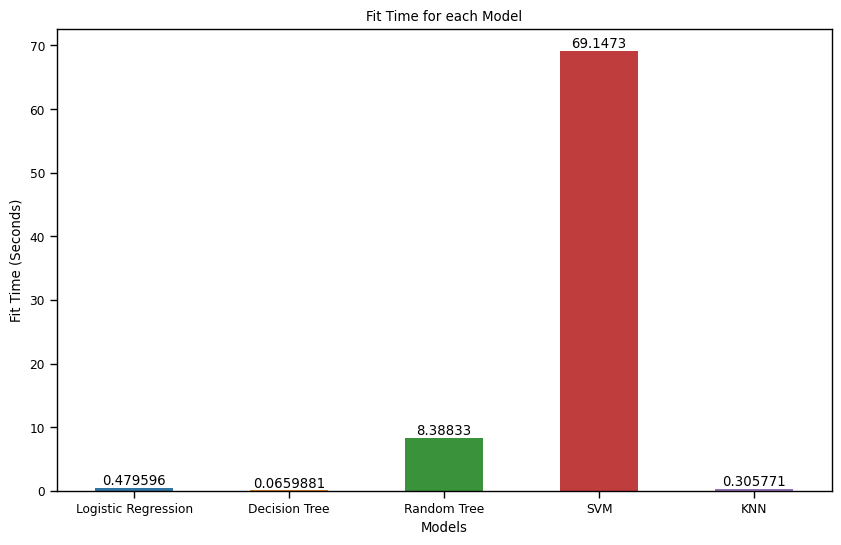

In [62]:
#Display Training Time
data = pd.DataFrame({
    'fit_time': fit_time,
    'model': model_list
})

fig = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='model', y='fit_time', data=data, width = 0.5)
ax.bar_label(ax.containers[0])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Fit Time (Seconds)")
plt.title("Fit Time for each Model")

# Display the plot
plt.show()

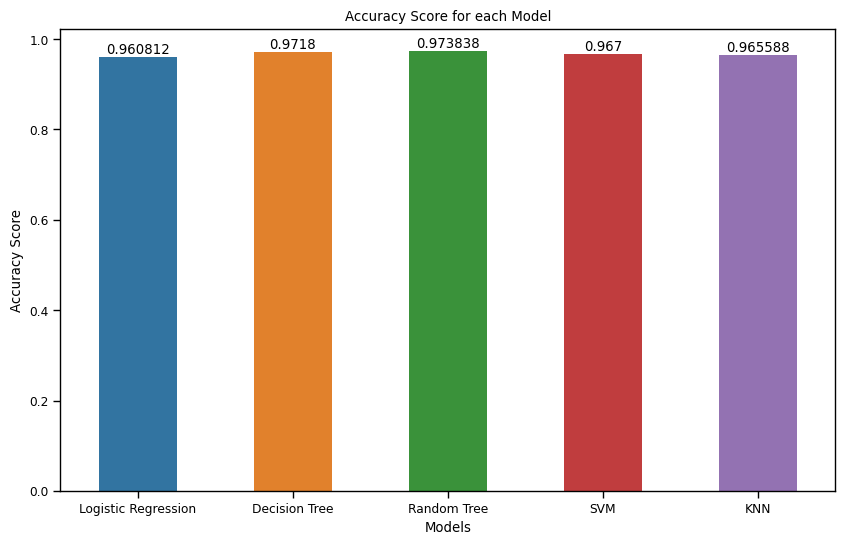

In [64]:
#Display Accuracy(Test) Score
data = pd.DataFrame({
    'test_score': test_score,
    'model': model_list
})

fig = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='model', y='test_score', data=data, width = 0.5)
ax.bar_label(ax.containers[0])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Accuracy Score")
plt.title("Accuracy Score for each Model")

# Display the plot
plt.show()

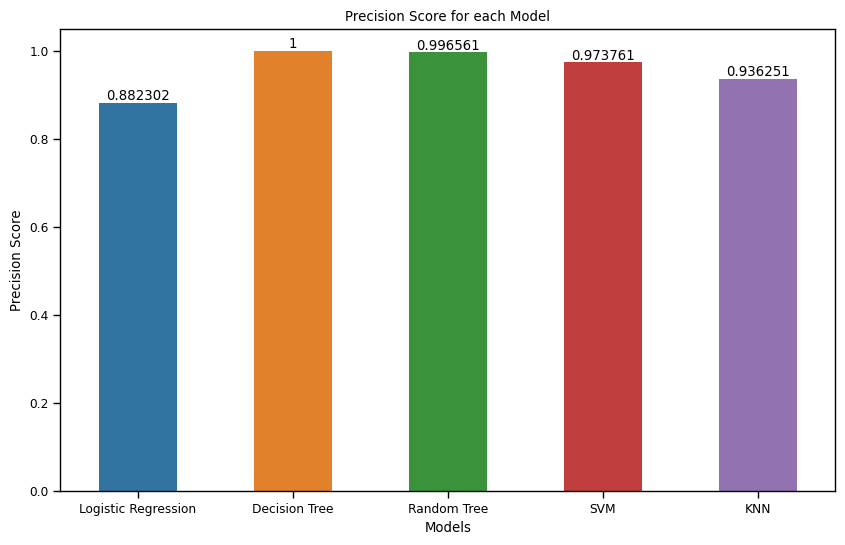

In [65]:
#Display Precision Score
data = pd.DataFrame({
    'precision_score': prec_score,
    'model': model_list
})

fig = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='model', y='precision_score', data=data, width = 0.5)
ax.bar_label(ax.containers[0])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Precision Score")
plt.title("Precision Score for each Model")

# Display the plot
plt.show()

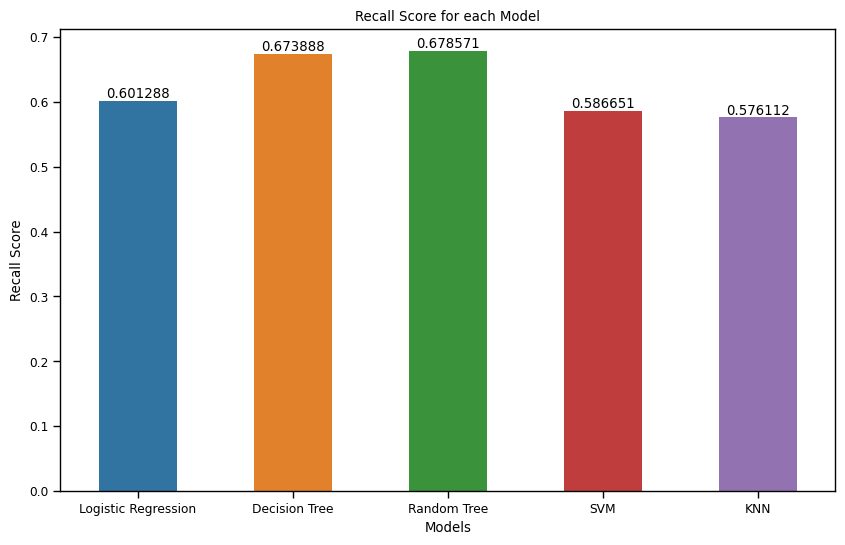

In [66]:
#Display Precision Score
data = pd.DataFrame({
    'recall_score': rec_score,
    'model': model_list
})

fig = plt.subplots(figsize=(10, 6))
ax = sns.barplot(x='model', y='recall_score', data=data, width = 0.5)
ax.bar_label(ax.containers[0])

# Add labels and title
plt.xlabel("Models")
plt.ylabel("Recall Score")
plt.title("Recall Score for each Model")

# Display the plot
plt.show()

#### Selecting the Best Model

After reviewing the precision, accuracy, and recall scores of each model, it appears that the Random Tree Classifier model was the overall best. It had the highest accuracy and recall score while only falling second in terms of precision.